<a href="https://colab.research.google.com/github/pazLevi/Deep-learning-projects/blob/main/human_or_horse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
PATH = '/content/drive/MyDrive/horse-or-human'

In [2]:
# !pip install matplotlib --upgrade

*imports*

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import *
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

load data


In [4]:
import glob
PATH_horses = glob.glob((PATH+'/train/horses/*'))
PATH_humans = glob.glob((PATH+'/train/humans/*'))

*Show examples*

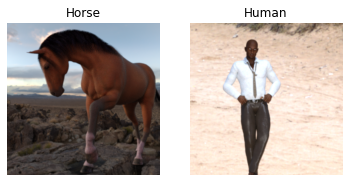

In [5]:
f, axarr = plt.subplots(1,2)
[axarr.set_axis_off() for axarr in axarr.ravel()]
axarr[0].imshow(plt.imread(PATH_horses[0]))
axarr[0].set_title('Horse')
axarr[1].imshow(plt.imread(PATH_humans[0]))
axarr[1].set_title('Human')
plt.show()

##*Introduce the balance the data*


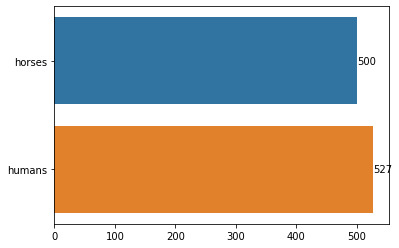

In [6]:
ax = sns.barplot(x=[len(PATH_horses),len(PATH_humans)],y=['horses','humans'])
ax.bar_label(ax.containers[0])
plt.show()

## Model

In [11]:
from tensorflow.keras.utils import Sequence

model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),                       
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),                       
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024,activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid') ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

Creat generators for train/test

In [12]:
data_train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
data_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

labeled the samples by the directory using Keras preprocessing

In [13]:
train_gn = data_train.flow_from_directory(PATH+'/train',
                                          target_size=(150,150),
                                          batch_size=128,
                                          class_mode='binary')
val_gn = data_val.flow_from_directory(PATH+'/validation',
                                      target_size=(150,150),
                                      batch_size=1,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


fit the model using Adam as a optimizer, loss function- Binary crossentropy


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_gn,verbose=1,validation_data=val_gn,epochs=15)

Epoch 1/15
9/9 [==============================] - 180s 20s/step - loss: 0.8997 - accuracy: 0.6144 - val_loss: 0.9187 - val_accuracy: 0.5000
Epoch 2/15
9/9 [==============================] - 11s 1s/step - loss: 0.4149 - accuracy: 0.7809 - val_loss: 1.1671 - val_accuracy: 0.6875
Epoch 3/15
9/9 [==============================] - 11s 1s/step - loss: 0.2564 - accuracy: 0.9036 - val_loss: 1.4361 - val_accuracy: 0.7656
Epoch 4/15
9/9 [==============================] - 11s 1s/step - loss: 0.1488 - accuracy: 0.9357 - val_loss: 1.3845 - val_accuracy: 0.7422
Epoch 5/15
9/9 [==============================] - 11s 1s/step - loss: 0.1440 - accuracy: 0.9426 - val_loss: 0.8846 - val_accuracy: 0.8398
Epoch 6/15
9/9 [==============================] - 11s 1s/step - loss: 0.0873 - accuracy: 0.9718 - val_loss: 1.0980 - val_accuracy: 0.8594
Epoch 7/15
9/9 [==============================] - 11s 1s/step - loss: 0.0799 - accuracy: 0.9737 - val_loss: 1.1048 - val_accuracy: 0.8594
Epoch 8/15
9/9 [================

In [15]:
model.evaluate(train_gn)

9/9 [==============================] - 8s 855ms/step - loss: 0.0022 - accuracy: 1.0000


[0.0022424610797315836, 1.0]

## Downloadimg real images from Google

In [16]:
array_real_images = glob.glob(PATH+'/real images/*')

In [18]:
dict_labels = {0:'horse',1:'human'}

In [19]:
def show_image(image,label,prediction=None):
  text = f"The true label is {dict_labels[label]}"
  if  np.array(prediction).size == 1:
    text += f'\nThe predict label is {dict_labels[prediction]}'
  plt.title(text)
  plt.imshow(image[0])

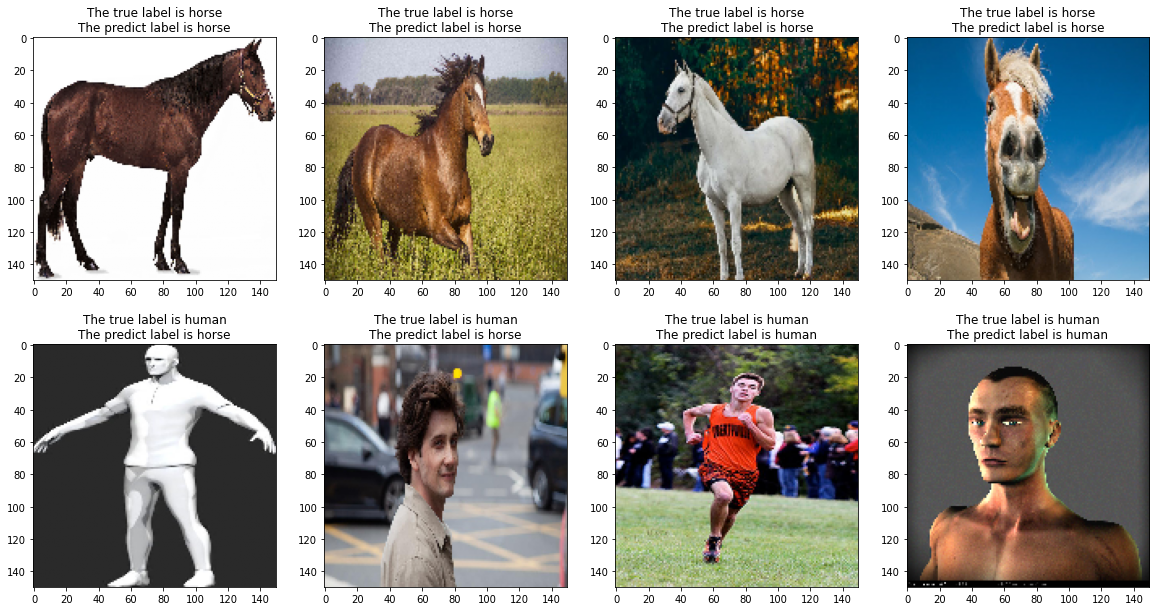

In [26]:
from keras.preprocessing import image

plt.figure(figsize=(20,16))
for i in range(len(array_real_images)):
  plt.subplot(3,4,i+1)
  plt.grid(False)
  label = 0 if 'Horse' in array_real_images[i] else 1
  img = (np.array(image.load_img(array_real_images[i],target_size=(150, 150, 3)))/255.0).reshape(1,150,150,3)
  prediction = 0 if model.predict(img) < 0.5 else 1
  show_image(img,label,prediction)
